## Classification 

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline


### Importing dateset

In [67]:
train_set = pd.read_csv('C-train.csv')
test_set = pd.read_csv('C-test.csv')


In [68]:
train_set

,x1,x2,x3,x4,x5,y
0,-146,-128,106,275,259,A
1,-61,108,-69,-178,-126,B
2,-155,4,-187,-197,-9,B
3,51,-23,25,44,14,A
4,177,-110,2,84,50,C
...,...,...,...,...,...,...
185,-126,-64,-126,-62,82,B
186,177,-3,72,59,-48,C
187,70,-67,139,218,103,C
188,-61,-34,-185,-172,-6,B


In [69]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      190 non-null    int64 
 1   x2      190 non-null    int64 
 2   x3      190 non-null    int64 
 3   x4      190 non-null    int64 
 4   x5      190 non-null    int64 
 5   y       190 non-null    object
dtypes: int64(5), object(1)
memory usage: 9.0+ KB


In [70]:
test_set

,x1,x2,x3,x4,x5,y
0,26,-57,9,64,60,C_01
1,89,-150,135,293,190,C_02
2,68,-122,206,351,194,C_03
3,128,-146,-109,-3,69,C_04
4,114,-171,164,343,214,C_05
5,-121,34,168,181,82,C_06
6,145,-26,28,36,-24,C_07
7,-156,-37,-167,-132,49,C_08
8,-57,-166,65,252,247,C_09
9,-156,-148,-16,156,239,C_10


In [71]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      10 non-null     int64 
 1   x2      10 non-null     int64 
 2   x3      10 non-null     int64 
 3   x4      10 non-null     int64 
 4   x5      10 non-null     int64 
 5   y       10 non-null     object
dtypes: int64(5), object(1)
memory usage: 608.0+ bytes


### Data Exploration

<AxesSubplot:xlabel='y', ylabel='count'>

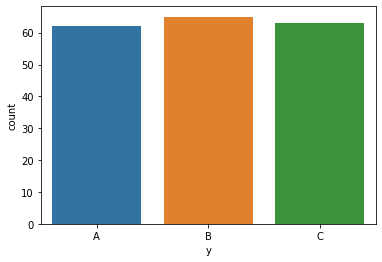

In [72]:
sns.countplot(x="y" , data=train_set)

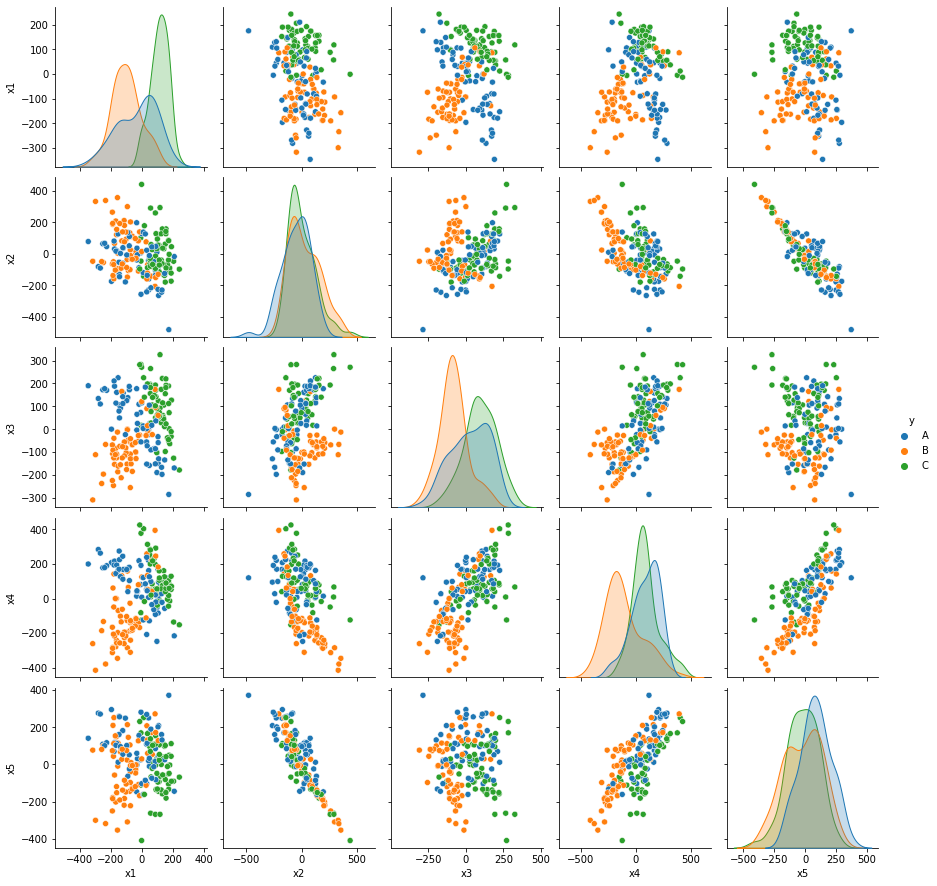

In [73]:
sns.pairplot(train_set, hue="y")

### To do **`Logistic Regression`**

In [74]:
# X_train = train_set.iloc[:, :-1]
# y_train = train_set.iloc[:, -1]
# X_test = test_set.iloc[:, :-1]
# y_test = train_set.loc[[83,167,157,29,96,16,184,30,14,45], ["y"]]


from sklearn.model_selection import train_test_split
X = train_set.iloc[:, :-1]
y = train_set.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Perform Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [76]:
y_test

108    B
74     C
161    C
95     C
123    A
71     B
18     C
124    A
143    A
7      C
5      C
187    C
156    C
168    B
185    B
113    C
37     A
66     B
136    A
131    C
56     C
101    C
134    B
180    C
170    B
150    A
63     A
60     B
116    B
33     C
4      C
55     B
94     B
44     B
45     C
26     C
176    A
138    A
111    A
8      B
106    B
89     B
90     C
171    A
173    A
109    B
24     A
30     B
Name: y, dtype: object

In [77]:
X_test

array([[-0.87547954,  1.6605026 , -0.35055685, -1.4683186 , -1.60632519],
       [ 0.9415364 , -0.29812434,  0.51399439,  0.55257101,  0.07372924],
       [ 0.644733  ,  0.48532644,  0.81818834,  0.27001501, -0.55629117],
       [ 0.99944926, -0.87372083,  0.18578512,  0.69999152,  0.57930117],
       [ 0.00769155,  1.32473798,  0.20980043, -0.83563888, -1.43520853],
       [-1.17228295, -0.52996181, -1.19909787, -0.49780019,  0.71152768],
       [ 0.70988496,  1.20482205,  1.09036187, -0.04939611, -1.30298203],
       [-1.80208529,  0.75713589,  1.51463238,  1.02554517,  0.60263526],
       [ 1.45551302,  0.08560665, -1.2631387 , -1.40075086, -1.30298203],
       [-0.10089506, -0.14623082,  2.36317341,  2.24790697,  1.13931932],
       [ 0.97049283,  0.47733204,  0.9382649 ,  0.33758275, -0.65740556],
       [ 0.44203799, -0.31411313,  1.21043843,  1.26510351,  0.61819132],
       [ 0.34069049, -0.40205148,  1.5546579 ,  1.65208237,  0.89042236],
       [-0.59315436,  1.83637931, -0.2

In [78]:
y_train

141    A
61     C
175    B
137    A
19     A
      ..
103    C
67     A
117    C
47     A
172    B
Name: y, Length: 142, dtype: object

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
clf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

In [81]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### To predict from test set

In [82]:
y_pred = clf.predict(X_test)


In [83]:
y_pred

array(['B', 'C', 'C', 'C', 'C', 'B', 'C', 'A', 'A', 'A', 'C', 'C', 'C',
       'B', 'B', 'C', 'A', 'B', 'A', 'A', 'A', 'C', 'B', 'A', 'B', 'A',
       'A', 'B', 'B', 'A', 'C', 'B', 'A', 'B', 'C', 'A', 'A', 'A', 'A',
       'B', 'B', 'B', 'C', 'A', 'A', 'C', 'A', 'B'], dtype=object)

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

cm_labls = train_set["y"].unique()
print(cm_labls)
confusion_matrix(y_test, y_pred, labels=cm_labls)

['A' 'B' 'C']


array([[12,  0,  1],
       [ 1, 15,  1],
       [ 6,  0, 12]], dtype=int64)

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.63      0.92      0.75        13
           B       1.00      0.88      0.94        17
           C       0.86      0.67      0.75        18

    accuracy                           0.81        48
   macro avg       0.83      0.82      0.81        48
weighted avg       0.85      0.81      0.82        48



In [86]:
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1 =",f1)

F1 = 0.81640625


In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8125